In [1]:
#Split and scale the data, train hyper parameters, Model, Evaluate

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
#from sklearn import cross_validation, metrics  
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
import pandas as pd
from sklearn import datasets, linear_model
from matplotlib import pyplot as plt
import numpy as np
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error

from sklearn import ensemble
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report


%store -r df

print(df.info())
print(df.shape)
print(df.head())

   

<class 'pandas.core.frame.DataFrame'>
Int64Index: 989 entries, 0 to 999
Data columns (total 15 columns):
search_word                  989 non-null object
contentDetails.caption       989 non-null bool
contentDetails.definition    989 non-null object
catID                        989 non-null int64
description                  975 non-null object
localized.description        974 non-null object
localized.title              989 non-null object
tags                         930 non-null object
title                        989 non-null object
commentCount                 989 non-null float64
dislikeCount                 989 non-null float64
likeCount                    989 non-null float64
view_bucket                  989 non-null float64
age_int                      989 non-null int64
target                       989 non-null int64
dtypes: bool(1), float64(4), int64(3), object(7)
memory usage: 116.9+ KB
None
(989, 15)
  search_word  contentDetails.caption contentDetails.definition  catID  \

In [2]:
#Scale all of the count data

minmax_scale = preprocessing.MinMaxScaler().fit(df[['commentCount','dislikeCount','likeCount']])

X = pd.DataFrame(minmax_scale.transform(df[['commentCount','dislikeCount','likeCount']]))
print(X.shape)
Y = df['target']

n = pd.get_dummies(df[['search_word','contentDetails.definition','contentDetails.caption']])

# X = pd.concat([X, n], axis=1)
print(X.shape)
print(X.head())





(989, 3)
(989, 3)
          0         1         2
0  0.000190  0.000486  0.000166
1  0.018638  0.000043  0.000012
2  0.018638  0.000316  0.000130
3  0.018638  0.001240  0.000682
4  0.000104  0.000140  0.000128


In [3]:
# add the dummy columns as variables
X = pd.DataFrame(np.hstack([X,n]))
X.shape



(989, 26)

In [4]:
# Normalize the time series data and store as new date column
ts = df['age_int']
scaled_ts = (ts-ts.min())/(ts.max()-ts.min())

X['Age'] = pd.Series(scaled_ts)
X['Age'].fillna((X['Age'].mean()), inplace=True)

print(X.shape)


(989, 27)


In [5]:
X.head()



,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,Age
0,0.000190146,0.000486296,0.000165565,False,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0.083731
1,0.0186383,4.25509e-05,1.24485e-05,False,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0.096052
2,0.0186383,0.000316092,0.000129998,False,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0.484536
3,0.0186383,0.00124005,0.000681999,False,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0.013075
4,0.000104011,0.00013981,0.000127686,False,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0.002514


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=.9, random_state=0)

X_train.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 890 entries, 304 to 684
Data columns (total 27 columns):
0      890 non-null object
1      890 non-null object
2      890 non-null object
3      890 non-null object
4      890 non-null object
5      890 non-null object
6      890 non-null object
7      890 non-null object
8      890 non-null object
9      890 non-null object
10     890 non-null object
11     890 non-null object
12     890 non-null object
13     890 non-null object
14     890 non-null object
15     890 non-null object
16     890 non-null object
17     890 non-null object
18     890 non-null object
19     890 non-null object
20     890 non-null object
21     890 non-null object
22     890 non-null object
23     890 non-null object
24     890 non-null object
25     890 non-null object
Age    890 non-null float64
dtypes: float64(1), object(26)
memory usage: 194.7+ KB


C:\Users\z002xczx\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [33]:


model = sm.OLS(list(y_train), X_train.astype(float)).fit()
y_pred = model.predict(X) 
# print(y_pred.head(10))
# print(y_test.head(10))
print(y_pred.head(10))
print(type(y_test.values))
#print(metrics.accuracy_score(y_test.values, y_pred.values))
print('Accuracy: ' + str(np.mean(y_pred.values == y_test.values)))
print_model = model.summary()
print(print_model)

0    0.0931204
1     0.118601
2     0.175921
3     0.108598
4       0.0807
5     0.104851
6     0.121276
7     0.084095
8    0.0948788
9     0.202743
dtype: object
<class 'numpy.ndarray'>
Accuracy: 0.0
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.275
Model:                            OLS   Adj. R-squared:                  0.254
Method:                 Least Squares   F-statistic:                     13.12
Date:                Fri, 22 Feb 2019   Prob (F-statistic):           2.80e-45
Time:                        08:59:12   Log-Likelihood:                -1550.3
No. Observations:                 890   AIC:                             3153.
Df Residuals:                     864   BIC:                             3277.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
        

C:\Users\z002xczx\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  # Remove the CWD from sys.path while we load stuff.


Accuracy of Lin Reg on test set: 0.07
Linear Regression R squared: 0.0670
Linear Regression RMSE: 1.5795
Linear Regression MAE: 1.2996


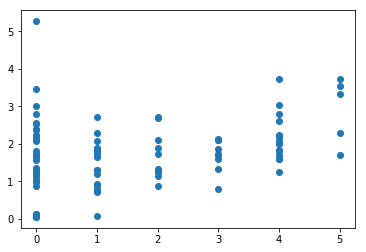

In [8]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

print('Accuracy of Lin Reg on test set: {:.2f}'.format(regressor.score(X_test, y_test)))
print('Linear Regression R squared: %.4f' % regressor.score(X_test, y_test))

lin_mse = mean_squared_error(y_pred, y_test)
lin_rmse = np.sqrt(lin_mse)
print('Linear Regression RMSE: %.4f' % lin_rmse)

lin_mae = mean_absolute_error(y_pred, y_test)
print('Linear Regression MAE: %.4f' % lin_mae)

plt.scatter(y_test,y_pred)

In [9]:
print('Linear model is not a good fit for the data so move on to Log Reg.')

Linear model is not a good fit for the data so move on to Log Reg.


In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics

Logit = LogisticRegression()

clf = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(metrics.accuracy_score(y_test, y_pred))

print('Logit R squared: %.4f' % clf.score(X_test, y_test))
logit_mse = mean_squared_error(y_pred, y_test)
logit_rmse = np.sqrt(logit_mse)
print('Logit RMSE: %.4f' % logit_rmse)

0.4444444444444444
Logit R squared: 0.4444
Logit RMSE: 1.8477


In [11]:
print('Logit relative poor performance without tuning. Next try some tuning')

Logit relative poor performance without tuning. Next try some tuning


In [12]:
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space}

logreg = LogisticRegression()
logreg_cv = GridSearchCV(logreg, param_grid, cv=5)
logreg_cv.fit(X_train,y_train)
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_)) 
print("Best score is {}".format(logreg_cv.best_score_))

C:\Users\z002xczx\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\z002xczx\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\z002xczx\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\z002xczx\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning

C:\Users\z002xczx\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\z002xczx\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\z002xczx\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\z002xczx\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning

C:\Users\z002xczx\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\z002xczx\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\z002xczx\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\z002xczx\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning

C:\Users\z002xczx\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\z002xczx\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\z002xczx\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\z002xczx\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning

Tuned Logistic Regression Parameters: {'C': 1389495.494373136}
Best score is 0.4460674157303371


C:\Users\z002xczx\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\z002xczx\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\z002xczx\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\z002xczx\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' i

In [13]:
print('Even with tuning Log Reg is not good.')

Even with tuning Log Reg is not good.


In [14]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.pipeline import Pipeline

nns = np.arange(1,20,1)

def train_and_predict(nn):
    knn = Pipeline([
                        ('knn', KNeighborsClassifier(n_neighbors=nn) )
                        ])
    knn.fit(X_train, y_train)
    score = metrics.accuracy_score(y_test, y_pred)
    return score



for nn in nns:
    print('nn: ', nn)
    print('Score: ', train_and_predict(nn))
    print()

nn:  1
Score:  0.4444444444444444

nn:  2
Score:  0.4444444444444444

nn:  3
Score:  0.4444444444444444

nn:  4
Score:  0.4444444444444444

nn:  5
Score:  0.4444444444444444

nn:  6
Score:  0.4444444444444444

nn:  7
Score:  0.4444444444444444

nn:  8
Score:  0.4444444444444444

nn:  9
Score:  0.4444444444444444

nn:  10
Score:  0.4444444444444444

nn:  11
Score:  0.4444444444444444

nn:  12
Score:  0.4444444444444444

nn:  13
Score:  0.4444444444444444

nn:  14
Score:  0.4444444444444444

nn:  15
Score:  0.4444444444444444

nn:  16
Score:  0.4444444444444444

nn:  17
Score:  0.4444444444444444

nn:  18
Score:  0.4444444444444444

nn:  19
Score:  0.4444444444444444



In [15]:
# Try SVM

from sklearn import svm
clf = svm.SVC(gamma='scale')
clf.fit(X_train, y_train) 

y_pred = clf.predict(X_test)

print(metrics.accuracy_score(y_test, y_pred))

print('SVM R squared: %.4f' % clf.score(X_test, y_test))
SVM_mse = mean_squared_error(y_pred, y_test)
SVM_rmse = np.sqrt(SVM_mse)
print('SVM RMSE: %.4f' % logit_rmse)

0.42424242424242425
SVM R squared: 0.4242
SVM RMSE: 1.8477


In [16]:
#Try Decision Tree Classifier

from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier

param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}

tree = DecisionTreeClassifier()

# Instantiate the RandomizedSearchCV object: tree_cv
tree_cv = RandomizedSearchCV(tree, param_dist, cv=5)

# Fit it to the data
tree_cv.fit(X_train,y_train)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))


Tuned Decision Tree Parameters: {'criterion': 'entropy', 'max_depth': None, 'max_features': 8, 'min_samples_leaf': 2}
Best score is 0.5651685393258427


C:\Users\z002xczx\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [17]:
print('Decision Tree Classifier slightly better than LogReg')

Decision Tree Classifier slightly better than LogReg


In [18]:
# predictors=list(X_train)
# feat_imp = pd.Series(regressor.feature_importances_, predictors).sort_values(ascending=False)
# feat_imp.plot(kind='bar', title='Importance of Features')
# plt.ylabel('Feature Importance Score')
# print('Accuracy of the linear regression model on test set: {:.3f}'.format(regressor.score(X_test, y_test)))
# pred=regressor.predict(X_test)
# print(classification_report(y_test, pred))

In [19]:
# Try random forest with default hyperparameters
from sklearn.ensemble import RandomForestClassifier
forest_class = RandomForestClassifier(random_state=42)
forest_class.fit(X_train, y_train)

C:\Users\z002xczx\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [21]:
print('Random Forest R squared: %.4f' % forest_class.score(X_test, y_test))
y_pred = forest_class.predict(X_test)
forest_mse = mean_squared_error(y_pred, y_test)
forest_rmse = np.sqrt(forest_mse)
print('Random Forest RMSE: %.4f' % forest_rmse)
print(metrics.accuracy_score(y_test, y_pred))

Random Forest R squared: 0.6869
Random Forest RMSE: 1.3143
0.6868686868686869


In [ ]:
# Evaluate and select optimal hyperparameters
print(forest_reg.get_params())

#Create a random grid for possible parameters to attempt and then use random search

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, scoring = 'neg_mean_squared_error', n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

In [ ]:
#Print and evaluate best parameters from the search
print(rf_random.best_params_)

best_random = rf_random.best_estimator_

In [ ]:
#Evaluate performance of the base model w/ searched hyperparameters

random_model = RandomForestClassifier(n_estimators = 1000, min_samples_split=2, min_samples_leaf=1, 
                                   max_features = 'auto', max_depth = 50, bootstrap = False, random_state = 42)




In [ ]:
random_model.fit(X_train, y_train)

In [ ]:
#Evaluate performance of random forest with random searched hyperparameters
print('Random Forest R squared: %.4f' % random_model.score(X_test, y_test))
y_pred = random_model.predict(X_test)
forest_mse = mean_squared_error(y_pred, y_test)
forest_rmse = np.sqrt(forest_mse)
print('Random Forest RMSE: %.4f' % forest_rmse)
print(metrics.accuracy_score(y_test, y_pred))

In [ ]:
# Try Grid Search to see if we can improve the hyperparameters further. 
# Setting grid around the previously identified optimal values
param_grid = {
    'bootstrap': [True],
    'max_depth': [30, 40, 50, 60, 70],
    'max_features': [2, 3],
    'min_samples_leaf': [1, 2, 3],
    'min_samples_split': [2, 3, 4, 5],
    'n_estimators': [100, 200, 300, 1000]
}


In [ ]:
# Create a base model
rf = RandomForestClassifier()

grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, scoring = 'neg_mean_squared_error',
                          cv = 3, n_jobs = -1, verbose = 2)

In [ ]:
grid_search.fit(X_train, y_train)
grid_search.best_params_

In [ ]:
#Evaluate performance of random forest with grid search hyperparameters
print('Random Forest R squared: %.4f' % grid_search.score(X_test, y_test))
y_pred = grid_search.predict(X_test)
forest_mse = mean_squared_error(y_pred, y_test)
forest_rmse = np.sqrt(forest_mse)
print('Random Forest RMSE: %.4f' % forest_rmse)
print(metrics.accuracy_score(y_test, y_pred))

In [ ]:
print('Random search appears to have slightly better results than our grid search')

In [ ]:
# Try Gradient Boosting
model = ensemble.GradientBoostingClassifier()
model.fit(X_train, y_train)

In [ ]:
print('Gradient Boosting R squared: %.4f' % model.score(X_test, y_test))
y_pred = model.predict(X_test)
model_mse = mean_squared_error(y_pred, y_test)
model_rmse = np.sqrt(model_mse)
print('Gradient Boosting RMSE: %.4f' % model_rmse)
print(metrics.accuracy_score(y_test, y_pred))

In [ ]:
print(model.get_params())

In [ ]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(2, 10, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
print(random_grid)

In [ ]:
#Basic GBM performance was poor - try tuning learning rate and number of trees
gbm = GradientBoostingClassifier()

gbm_random = RandomizedSearchCV(estimator = gbm, param_distributions = random_grid, scoring = 'neg_mean_squared_error', n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
gbm_random.fit(X_train, y_train)


In [ ]:
#Print and evaluate best parameters from the search
print(gbm_random.best_params_)

best_random = gbm_random.best_estimator_

In [ ]:
#Evaluate performance of the base model w/ searched hyperparameters

random_model = GradientBoostingClassifier(n_estimators = 100, min_samples_split=5, min_samples_leaf=4, 
                                   max_features = 'sqrt', max_depth = 7, random_state = 42)

In [ ]:
random_model.fit(X_train, y_train)

In [ ]:
#Evaluate performance of GBM with random searched hyperparameters
print('GBM - random searched R squared: %.4f' % random_model.score(X_test, y_test))
y_pred = random_model.predict(X_test)
GBM_mse = mean_squared_error(y_pred, y_test)
GBM_rmse = np.sqrt(GBM_mse)
print('GBM - random searched RMSE: %.4f' % forest_rmse)
print(metrics.accuracy_score(y_test, y_pred))

In [ ]:
('GBM with random searched hyperparameters on par with Random Forest')

In [ ]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [30, 40, 50, 60, 70],
    'max_features': [2, 3],
    'min_samples_leaf': [1, 2, 3],
    'min_samples_split': [2, 3, 4, 5],
    'n_estimators': [100, 200, 300, 1000]
}


In [ ]:
# Create a model
GBC = GradientBoostingClassifier()

grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, scoring = 'neg_mean_squared_error',
                          cv = 3, n_jobs = -1, verbose = 2)
grid_search.fit(X_train, y_train)

In [ ]:
#Evaluate performance of GBM with grid searched hyperparameters
print('GBM - grid searched R squared: %.4f' % grid_search.score(X_test, y_test))
y_pred = grid_search.predict(X_test)
GBM_mse = mean_squared_error(y_pred, y_test)
GBM_rmse = np.sqrt(forest_mse)
print('GBM - grid searched RMSE: %.4f' % forest_rmse)
print(metrics.accuracy_score(y_test, y_pred))

In [ ]:
predictors=list(X_train)
feat_imp = pd.Series(random_model.feature_importances_, predictors).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Importance of Features')
plt.ylabel('Feature Importance Score')
print('Accuracy of the GBM on test set: {:.3f}'.format(random_model.score(X_test, y_test)))
pred=random_model.predict(X_test)
#print(classification_report(y_test, pred))

In [ ]:
print(y_test.value_counts())

In [ ]:
print('Notes:  We can conclude that Age, dislike count, like count, comment count in this order are the most important features. ')

